In [255]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [256]:
pwd


'C:\\Users\\12162'

In [257]:
# Load combined csv

firesall = ('final_data_set.all_combined.xlsx')

firesall = pd.read_excel("C:\\Users\\12162\\Downloads\\final_data_set.all_combined.xlsx")
firesall.shape
    
# list(data) or 
list(firesall.columns)     

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape',
 'LENGTH_OF_BURN',
 'COUNTY_2',
 'Population Density',
 'Housing Density',
 'Water area',
 'Temp High',
 'Temp Low',
 'Dew Point',
 'Humidity',
 '"ICON"',
 'Moon Phase',
 'Precip Intensity',
 'Precip Probability',
 'uv index',
 'windBearing',
 'windGust',
 'Wind Speed']

In [259]:
cmpD = firesall

In [260]:
locations=firesall[['OBJECTID','STATE','COUNTY_2','LATITUDE','LONGITUDE']].set_index('OBJECTID').sort_index()

In [261]:
locations

,STATE,COUNTY_2,LATITUDE,LONGITUDE
OBJECTID,,,,
17,CA,Amador County,38.523333,-120.211667
18,CA,El Dorado County,38.780000,-120.260000
189,AZ,Gila County,33.723333,-111.275000
549,CA,Kern County,35.688056,-118.438333
583,AZ,Gila County,33.933611,-111.379722
...,...,...,...,...
1878524,CA,Butte County,39.762464,-121.736696
1878989,CA,Monterey County,36.391049,-121.595123
1879337,CA,Contra Costa County,37.904877,-121.874159


In [262]:
cmpD=cmpD.drop(columns=['FOD_ID','FPA_ID','SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM','NWCG_REPORTING_AGENCY',\
                   'SOURCE_REPORTING_UNIT','NWCG_REPORTING_UNIT_NAME','NWCG_REPORTING_UNIT_ID','LOCAL_FIRE_REPORT_ID',\
                   'LOCAL_INCIDENT_ID','LOCAL_FIRE_REPORT_ID','FIRE_CODE','ICS_209_INCIDENT_NUMBER',\
                   'ICS_209_INCIDENT_NUMBER','MTBS_ID','DISCOVERY_DOY','DISCOVERY_TIME','ICS_209_NAME','ICS_209_NAME','STAT_CAUSE_CODE'])

In [263]:
cmpD.columns

Index(['OBJECTID', 'SOURCE_REPORTING_UNIT_NAME', 'FIRE_NAME', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'STAT_CAUSE_DESCR',
       'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape', 'LENGTH_OF_BURN', 'COUNTY_2',
       'Population Density', 'Housing Density', 'Water area', 'Temp High',
       'Temp Low', 'Dew Point', 'Humidity', '"ICON"', 'Moon Phase',
       'Precip Intensity', 'Precip Probability', 'uv index', 'windBearing',
       'windGust', 'Wind Speed'],
      dtype='object')

In [264]:
len(cmpD.columns)


39

In [265]:
cmpD.head()

,OBJECTID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,...,Dew Point,Humidity,"""ICON""",Moon Phase,Precip Intensity,Precip Probability,uv index,windBearing,windGust,Wind Speed
0,549,Sequoia National Forest,NINE,NINE,NaN,2005,2005-07-09,Miscellaneous,2005-07-10,191.0,...,49.34,0.40,0,0.11,0.0000,0.00,0.0,228.0,23.53,4.45
1,583,Tonto National Forest,OAK,OAK,NaN,2005,2005-07-16,Lightning,2005-07-20,201.0,...,52.42,0.32,rain,0.34,0.0185,1.00,0.0,188.0,17.93,2.85
2,592,Tonto National Forest,TW0 BAR,TW0 BAR,NaN,2005,2005-07-19,Lightning,2005-07-25,206.0,...,51.59,0.31,0,0.45,0.0586,0.21,0.0,335.0,18.59,3.69
3,745,Custer National Forest,SAWMILL GULCH,SAWMILL GULCH,NaN,2005,2005-04-05,Lightning,2005-04-09,99.0,...,30.92,0.59,rain,0.90,0.0020,0.88,0.0,317.0,29.61,8.99
4,1587,Custer National Forest,ERICKSON SPRING,ERICKSON SPRING,NaN,2005,2005-08-22,Lightning,2005-09-01,244.0,...,46.59,0.36,0,0.63,0.0000,0.00,0.0,187.0,14.47,4.07


In [266]:
# Display counts per cause

cmpD.STAT_CAUSE_DESCR.value_counts().head(12)

Lightning            5881
Miscellaneous        1541
Missing/Undefined    1131
Arson                 927
Equipment Use         770
Debris Burning        577
Campfire              219
Powerline             202
Railroad              105
Smoking                91
Fireworks              53
Children               52
Name: STAT_CAUSE_DESCR, dtype: int64

In [267]:
#Display counts per 

cmpD.LENGTH_OF_BURN.value_counts().head(10)


1 days 00:00:00.000000000    1191
2 days 00:00:00.000000000     884
0 days 00:00:00.000000000     861
3 days 00:00:00.000000000     639
4 days 00:00:00.000000000     535
5 days 00:00:00.000000000     376
6 days 00:00:00.000000000     343
7 days 00:00:00.000000000     291
8 days 00:00:00.000000000     215
9 days 00:00:00.000000000     171
Name: LENGTH_OF_BURN, dtype: int64

In [268]:
cmpD.COUNTY_2.value_counts().head(80)

Yukon-Koyukuk Census Area       631
Idaho County                    230
Lincoln County                  230
Elko County                     183
Owyhee County                   129
                               ... 
Teton County                     38
Cochise County                   38
Lassen County                    37
Garfield County                  37
Fairbanks North Star Borough     36
Name: COUNTY_2, Length: 80, dtype: int64

In [269]:
cmpD.FIRE_YEAR.value_counts().head(5)

2006    894
2011    879
2000    728
2012    659
2015    628
Name: FIRE_YEAR, dtype: int64

In [270]:
cmpD.count(axis=0, level=None, numeric_only=False)

OBJECTID                      11559
SOURCE_REPORTING_UNIT_NAME    11559
FIRE_NAME                     10680
MTBS_FIRE_NAME                 9220
COMPLEX_NAME                   1631
FIRE_YEAR                     11559
DISCOVERY_DATE                11559
STAT_CAUSE_DESCR              11559
CONT_DATE                      9023
CONT_DOY                       9023
CONT_TIME                      8763
FIRE_SIZE                     11559
FIRE_SIZE_CLASS               11559
LATITUDE                      11559
LONGITUDE                     11559
OWNER_CODE                    11559
OWNER_DESCR                   11559
STATE                         11559
COUNTY                         6328
FIPS_CODE                      6328
FIPS_NAME                      6328
Shape                         11559
LENGTH_OF_BURN                 9023
COUNTY_2                      11559
Population Density            11551
Housing Density               11551
Water area                    11551
Temp High                   

In [271]:
cmpD.corr(method ='pearson') 

,OBJECTID,FIRE_YEAR,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE,Population Density,...,Temp Low,Dew Point,Humidity,Moon Phase,Precip Intensity,Precip Probability,uv index,windBearing,windGust,Wind Speed
OBJECTID,1.000000,0.666919,-0.105838,-0.042969,-0.015204,-0.055221,0.058550,0.233591,0.169168,0.028020,...,0.267412,0.232205,0.219989,0.156940,-0.001189,0.060324,0.144703,0.174759,0.280721,0.196951
FIRE_YEAR,0.666919,1.000000,-0.047526,-0.071423,0.051869,0.053621,-0.030670,0.023276,0.150694,-0.039102,...,0.451705,0.353091,0.330029,0.281850,0.027082,0.174657,0.117419,0.326602,0.569966,0.209532
CONT_DOY,-0.105838,-0.047526,1.000000,-0.160787,0.123643,0.287807,-0.288491,-0.127814,-0.147209,-0.002366,...,-0.036911,0.012786,-0.044875,-0.050926,-0.021452,0.054257,-0.187362,-0.068003,-0.159893,-0.268394
CONT_TIME,-0.042969,-0.071423,-0.160787,1.000000,-0.061313,-0.118856,0.094060,-0.013107,0.096312,0.019652,...,-0.013479,-0.037693,-0.075022,-0.012484,0.006829,-0.027314,0.054263,-0.030206,-0.000300,0.058683
FIRE_SIZE,-0.015204,0.051869,0.123643,-0.061313,1.000000,0.192263,-0.194661,-0.085497,-0.019446,-0.023180,...,-0.023663,-0.042338,-0.056473,0.002627,-0.005700,-0.012657,-0.072176,-0.025389,0.017705,-0.040532
LATITUDE,-0.055221,0.053621,0.287807,-0.118856,0.192263,1.000000,-0.757740,-0.270925,-0.234190,-0.208581,...,-0.249204,-0.211689,-0.162550,-0.116166,-0.022719,-0.029004,-0.290430,-0.103997,-0.130231,-0.220959
LONGITUDE,0.058550,-0.030670,-0.288491,0.094060,-0.194661,-0.757740,1.000000,0.302356,0.207386,0.145278,...,0.175693,0.187499,0.225143,0.102608,0.023673,0.020013,0.196111,0.101040,0.133845,0.238763
OWNER_CODE,0.233591,0.023276,-0.127814,-0.013107,-0.085497,-0.270925,0.302356,1.000000,0.372913,0.125193,...,0.090883,0.123423,0.177006,0.076957,0.003917,-0.044588,0.171371,0.100375,0.076884,0.206331
FIPS_CODE,0.169168,0.150694,-0.147209,0.096312,-0.019446,-0.234190,0.207386,0.372913,1.000000,-0.020327,...,0.069744,0.094640,0.096970,0.049225,-0.006940,-0.040375,0.105426,0.035374,0.128838,0.224277
Population Density,0.028020,-0.039102,-0.002366,0.019652,-0.023180,-0.208581,0.145278,0.125193,-0.020327,1.000000,...,0.154395,0.178422,0.159500,0.075018,0.012668,0.035651,0.154797,0.043434,0.001318,0.052824


In [272]:
cmpD.corr(method ='kendall') 

,OBJECTID,FIRE_YEAR,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE,Population Density,...,Temp Low,Dew Point,Humidity,Moon Phase,Precip Intensity,Precip Probability,uv index,windBearing,windGust,Wind Speed
OBJECTID,1.000000,0.525159,-0.094355,-0.013359,-0.038354,-0.078110,0.114074,0.157530,0.088220,0.048663,...,0.173087,0.151094,0.158157,0.128605,0.106292,0.108630,0.114546,0.111491,0.210171,0.166831
FIRE_YEAR,0.525159,1.000000,-0.017290,-0.069502,0.045211,0.020909,0.008473,0.018989,0.094079,-0.034393,...,0.259537,0.213315,0.222265,0.220960,0.249036,0.246066,0.089097,0.222115,0.431790,0.170532
CONT_DOY,-0.094355,-0.017290,1.000000,-0.153750,0.117472,0.246946,-0.212409,-0.034752,-0.017668,-0.096976,...,-0.047691,0.009401,0.001832,-0.037176,0.043515,0.047447,-0.149472,-0.032262,-0.094792,-0.167862
CONT_TIME,-0.013359,-0.069502,-0.153750,1.000000,-0.048123,-0.079246,0.070597,-0.007337,0.020600,0.076786,...,0.010597,-0.024757,-0.060969,-0.012110,-0.043772,-0.038830,0.052945,-0.029183,-0.002777,0.059501
FIRE_SIZE,-0.038354,0.045211,0.117472,-0.048123,1.000000,0.134483,-0.181881,-0.120150,-0.062459,-0.126326,...,-0.030703,-0.056225,-0.094408,-0.026819,-0.012762,-0.014428,-0.063263,-0.032489,0.004540,-0.058101
LATITUDE,-0.078110,0.020909,0.246946,-0.079246,0.134483,1.000000,-0.426712,-0.195068,-0.093749,-0.339277,...,-0.178099,-0.124060,-0.097567,-0.072887,-0.024265,-0.021792,-0.212243,-0.033611,-0.065317,-0.142165
LONGITUDE,0.114074,0.008473,-0.212409,0.070597,-0.181881,-0.426712,1.000000,0.245738,0.172237,0.243066,...,0.084057,0.079703,0.169128,0.061094,0.005820,0.003671,0.125762,0.014930,0.103935,0.183899
OWNER_CODE,0.157530,0.018989,-0.034752,-0.007337,-0.120150,-0.195068,0.245738,1.000000,0.200425,0.160151,...,0.040462,0.084154,0.142749,0.065275,-0.037518,-0.034440,0.131366,0.075916,0.047621,0.131774
FIPS_CODE,0.088220,0.094079,-0.017668,0.020600,-0.062459,-0.093749,0.172237,0.200425,1.000000,0.028113,...,0.011861,0.064768,0.115575,0.040039,-0.049595,-0.048299,0.063035,0.026081,0.047039,0.095076
Population Density,0.048663,-0.034393,-0.096976,0.076786,-0.126326,-0.339277,0.243066,0.160151,0.028113,1.000000,...,0.179163,0.182014,0.176833,0.109598,0.047747,0.055226,0.244287,0.123943,0.040005,0.137331


<BarContainer object of 11559 artists>

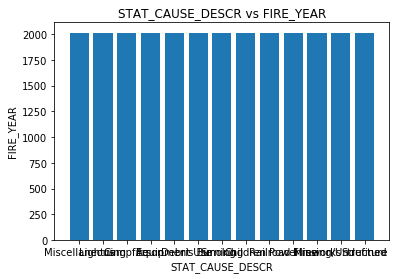

In [273]:
plt.xlabel('STAT_CAUSE_DESCR')
plt.ylabel('FIRE_YEAR')
plt.title('STAT_CAUSE_DESCR vs FIRE_YEAR')
plt.bar(cmpD["STAT_CAUSE_DESCR"], cmpD["FIRE_YEAR"])


(array([1028.,  869.,  440., 1709.,  851.,  900., 2138.,  822., 1538.,
        1264.]),
 array([1992. , 1994.3, 1996.6, 1998.9, 2001.2, 2003.5, 2005.8, 2008.1,
        2010.4, 2012.7, 2015. ]),
 <a list of 10 Patch objects>)

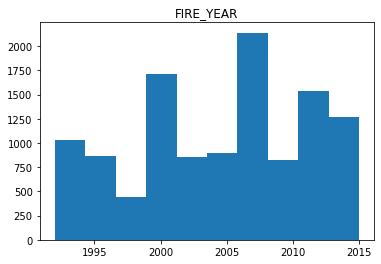

In [275]:
plt.title('FIRE_YEAR')
plt.hist(cmpD['FIRE_YEAR'])

(array([2772., 2558., 2071., 1839.,  611.,  545.,  465.,  315.,  248.,
         135.]),
 array([  0. ,  91.2, 182.4, 273.6, 364.8, 456. , 547.2, 638.4, 729.6,
        820.8, 912. ]),
 <a list of 10 Patch objects>)

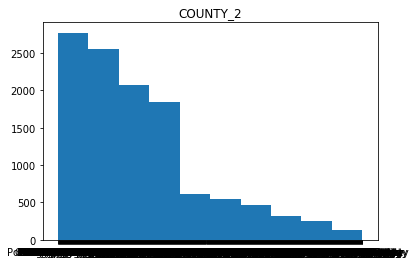

In [278]:
plt.title('COUNTY_2')
plt.hist(cmpD['COUNTY_2'])